#Avocado Price Forecasting
Aim :
To predict / forecast the average price of Avocado based on time series data.
It is a typical Time Series Analysis problem.
Dataset Attributes
Date :The date of the observation
AveragePrice : the average price of a single avocado
Total Volume : Total number of avocados sold
4046 : Total number of avocados with PLU 4046 sold
4225 : Total number of avocados with PLU 4225 sold
4770 : Total number of avocados with PLU 4770 sold
Total Bags : Total number of bags
Small Bags : Total number of small bags
Large Bags : Total number of large bags
XLarge Bags : Extra Large Bags
type : conventional or organic
year : year of the date
region : the city or region of the observation
Notebook Contents :
Dataset Information
Exploratory Data Analysis (EDA)
Summary of EDA
Time Series Analysis
Modeling
Conclusion
What you will learn :
Statistical Tests for Time Series Analysis.
Order selection for ARIMA & SARIMA models.
In-sample and Out-of-sample forecasting using rolling and non-rolling methods.
Difference between forecast function and predict function of ARIMA & SARIMA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [9]:
data = pd.read_csv('/content/avocado.csv')

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [10]:
data.shape

(18249, 14)

In [11]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [13]:
# prompt: check the percentage of null values in each column

((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)


,0
Unnamed: 0,0.00
Date,0.00
AveragePrice,0.00
Total Volume,0.00
4046,0.00
4225,0.00
4770,0.00
Total Bags,0.00
Small Bags,0.00
Large Bags,0.00


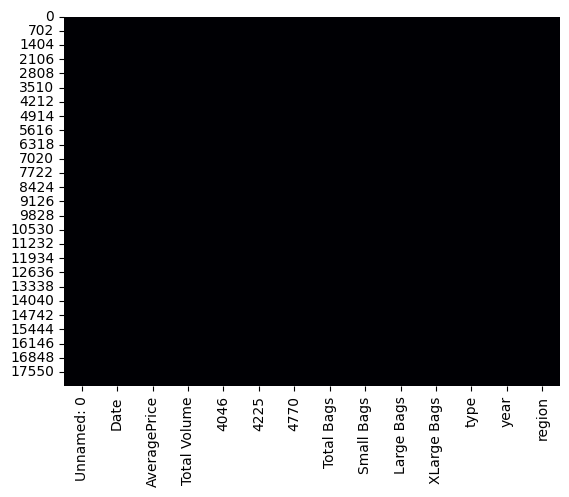

In [14]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [15]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,5507,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,5399,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,5291,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,5183,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,5075,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


I will repeat and explain about these steps in detail below. Till then, we will just use this for visualization if required.

#EDA

<ipython-input-16-4991e3ad2080>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice']);
<ipython-input-16-4991e3ad2080>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AveragePrice']);
<ipython-input-16-4991e3ad2080>:14: UserWarning: Ignoring `palette` because no `hue` vari

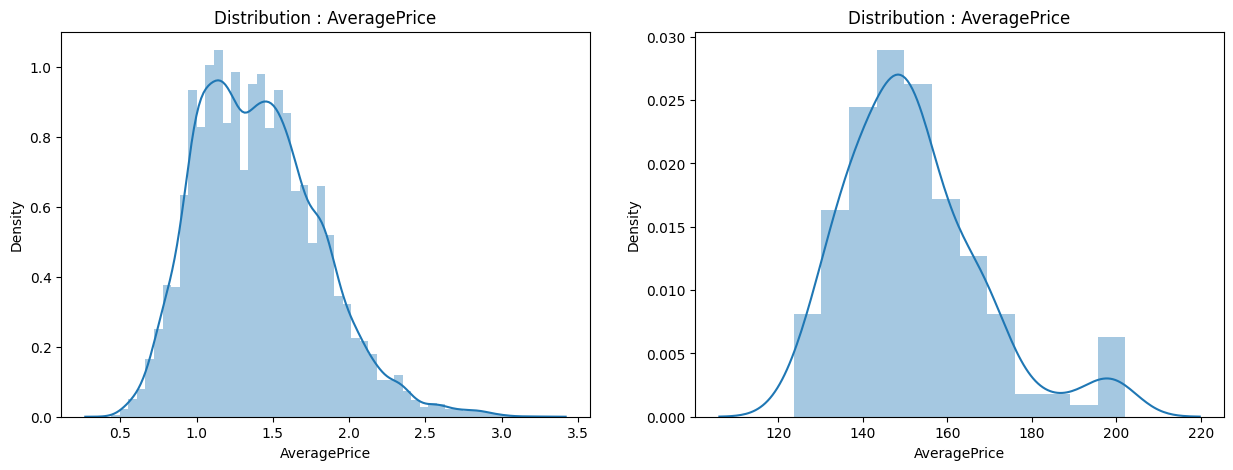

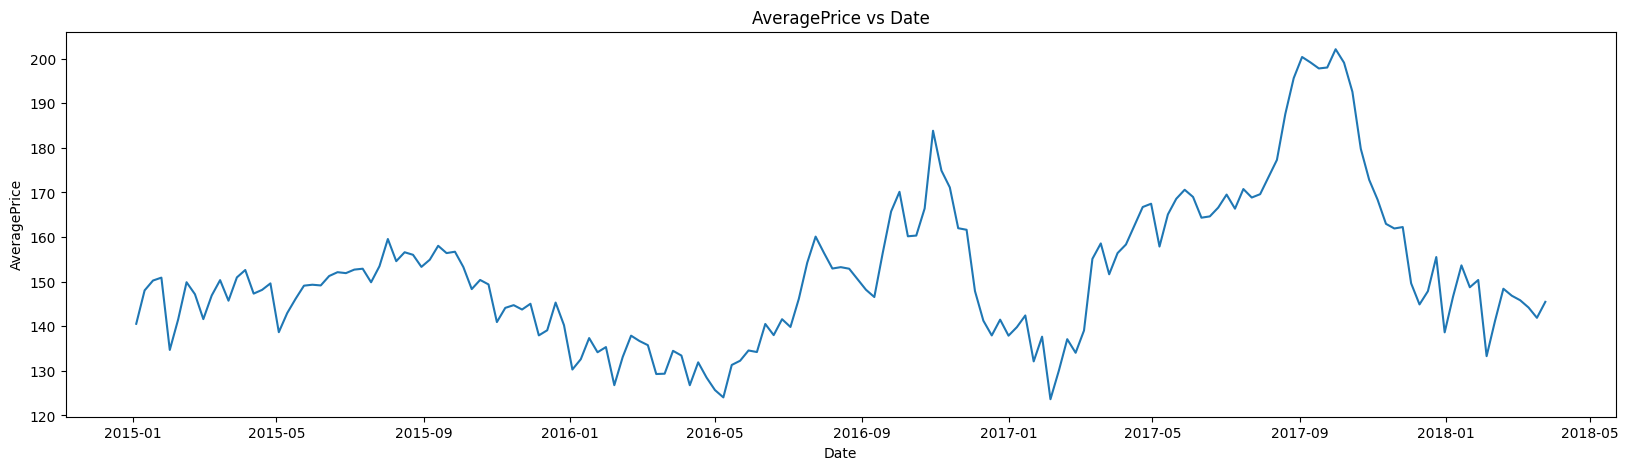

In [16]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['AveragePrice']);
plt.title('Distribution : AveragePrice')

plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice']);
plt.title('Distribution : AveragePrice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

Distribution of AveragePrice that is not resampled is pretty much a normally distributed curve. It highlights small double peaks but we will allow it in this case.


Distribution of AveragePrice of the resampled data displays a much better normally distribution curve.


We can clearly observe a positive trend in AveragePrice w.r.t Date. Repetitive 3 peaks at consistent intervals of time can be observed.


AveragePrice drops around the months of December / January and rises to it's highest value for the months September - November.

In [17]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Unnamed: 0 Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])

<ipython-input-19-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-19-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

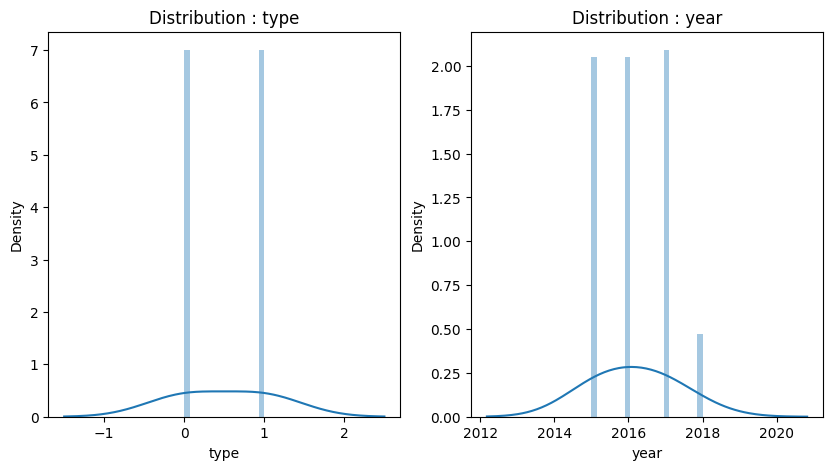

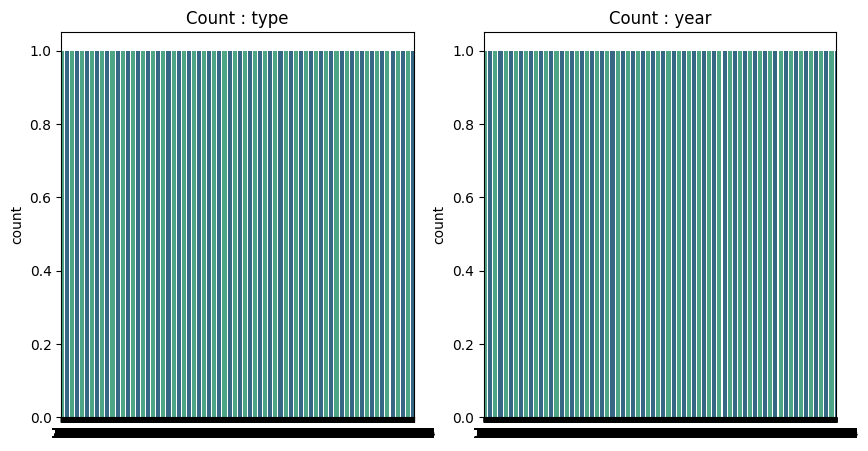

In [19]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.countplot(data[categorical_features[i]],palette = color1);
    title = 'Count : ' + categorical_features[i]
    plt.title(title)

<ipython-input-20-6a38285707c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
<ipython-input-20-6a38285707c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
<ipython-input-20-6a38285707c4>:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')


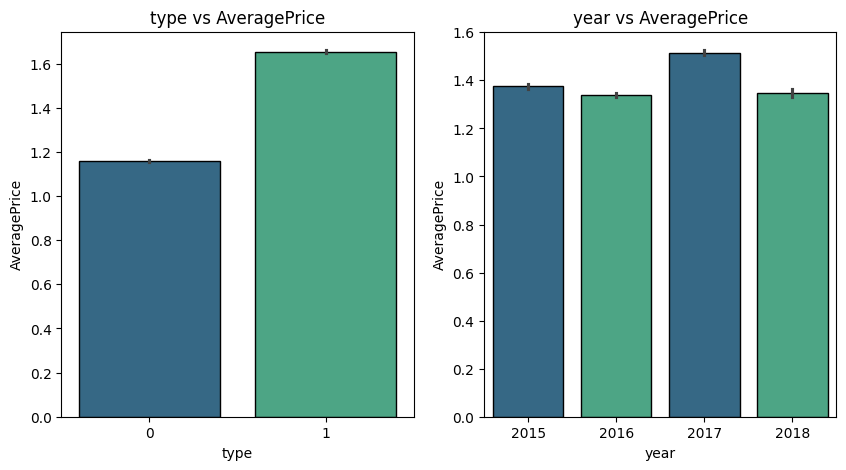

In [20]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
    title = categorical_features[i] + ' vs AveragePrice'
    plt.title(title);

<ipython-input-21-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-21-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numerical_features[i]])
<ipython-input-21-a5ddc8c78660>:4: UserWarning: 

`distplot` is a deprecated f

ValueError: num must be an integer with 1 <= num <= 8, not 9

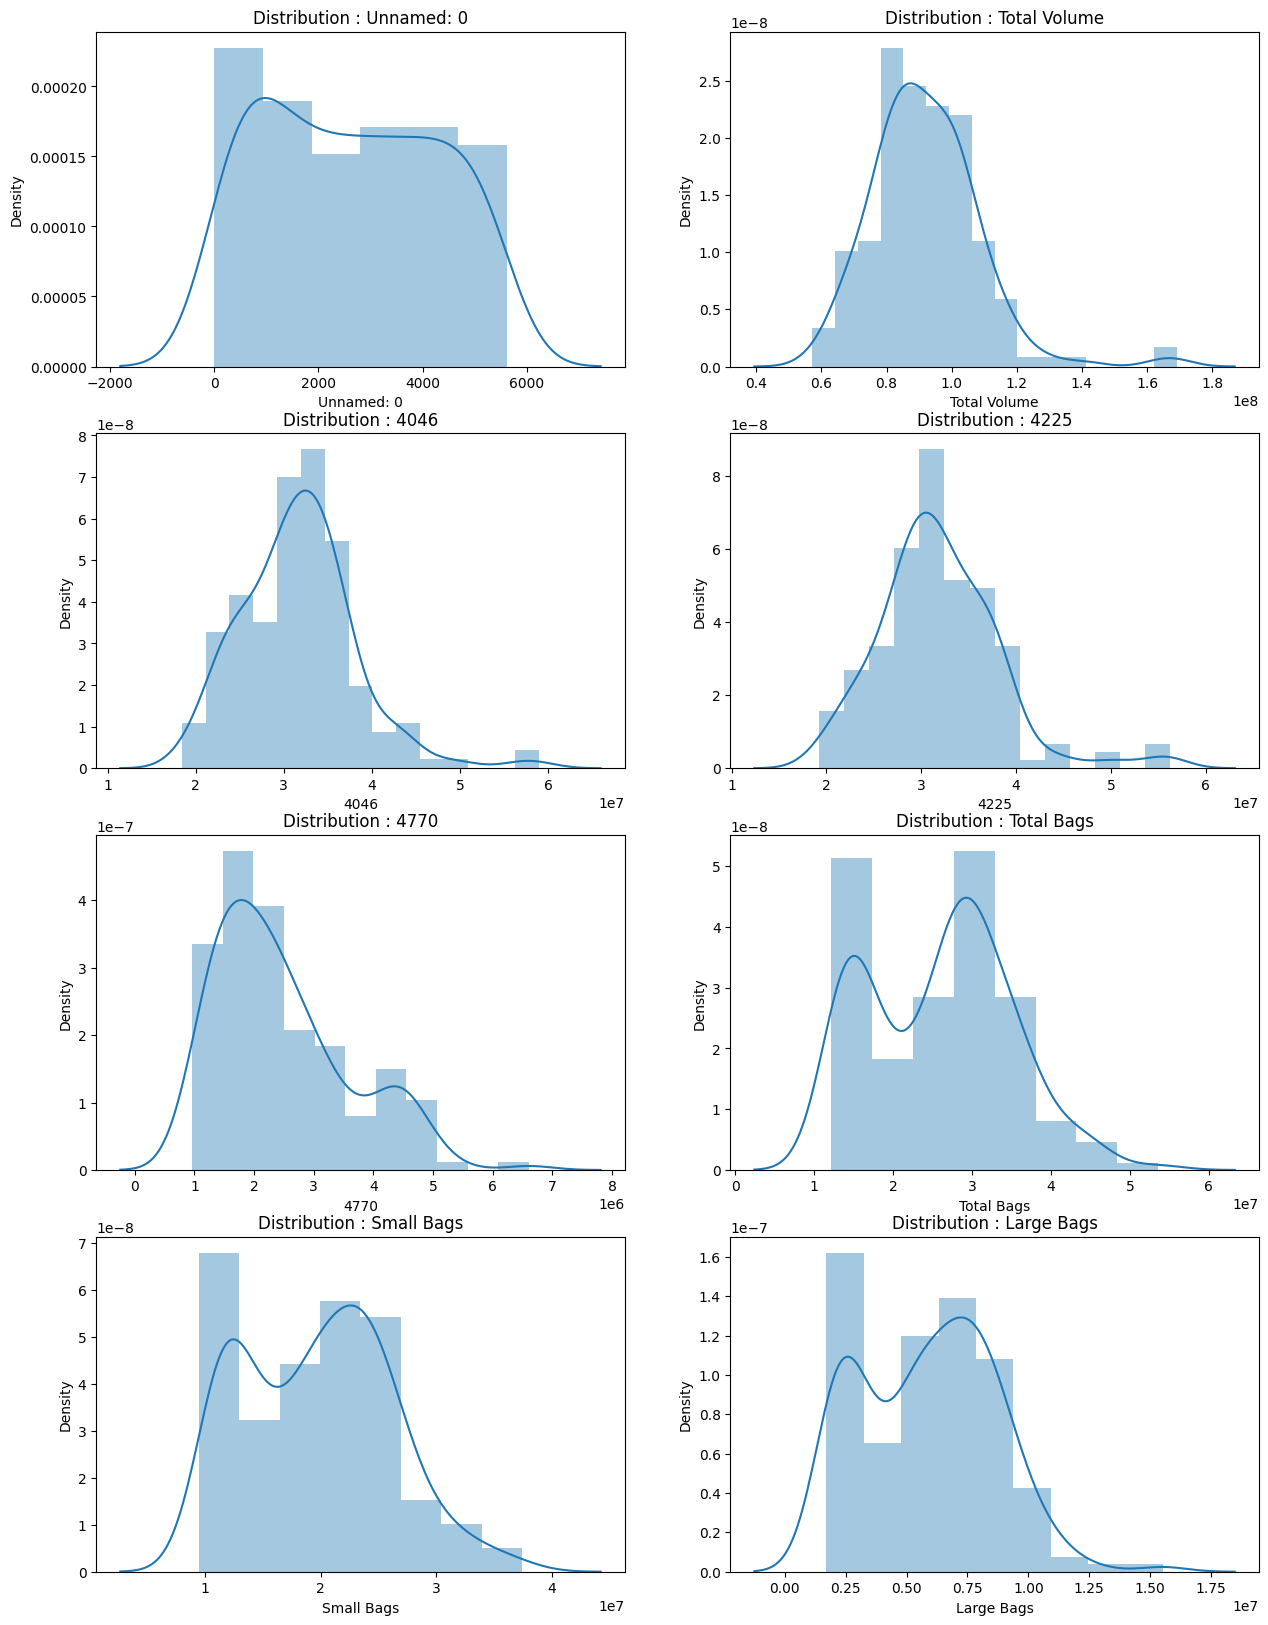

In [21]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(df1[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

In [22]:
total_volume = [sum(data[data['type'] == 0]['Total Volume']) / sum(data['Total Volume']) * 100,
                sum(data[data['type'] == 1]['Total Volume']) / sum(data['Total Volume']) * 100]

avocado_4046 = [sum(data[data['type'] == 0]['4046']) / sum(data['4046']) * 100,
                sum(data[data['type'] == 1]['4046']) / sum(data['4046']) * 100]

avocado_4225 = [sum(data[data['type'] == 0]['4225']) / sum(data['4225']) * 100,
                sum(data[data['type'] == 1]['4225']) / sum(data['4225']) * 100]

avocado_4770 = [sum(data[data['type'] == 0]['4770']) / sum(data['4770']) * 100,
                sum(data[data['type'] == 1]['4770']) / sum(data['4770']) * 100]

total_bags = [sum(data[data['type'] == 0]['Total Bags']) / sum(data['Total Bags']) * 100,
              sum(data[data['type'] == 1]['Total Bags']) / sum(data['Total Bags']) * 100]

small_bags = [sum(data[data['type'] == 0]['Small Bags']) / sum(data['Small Bags']) * 100,
              sum(data[data['type'] == 1]['Small Bags']) / sum(data['Small Bags']) * 100]

large_bags = [sum(data[data['type'] == 0]['Large Bags']) / sum(data['Large Bags']) * 100,
              sum(data[data['type'] == 1]['Large Bags']) / sum(data['Large Bags']) * 100]

xlarge_bags = [sum(data[data['type'] == 0]['XLarge Bags']) / sum(data['XLarge Bags']) * 100,
               sum(data[data['type'] == 1]['XLarge Bags']) / sum(data['XLarge Bags']) * 100]

type_numerical_features_percentage = [total_volume,avocado_4046,avocado_4225,avocado_4770,
                          total_bags,small_bags,large_bags,xlarge_bags]

ValueError: num must be an integer with 1 <= num <= 8, not 9

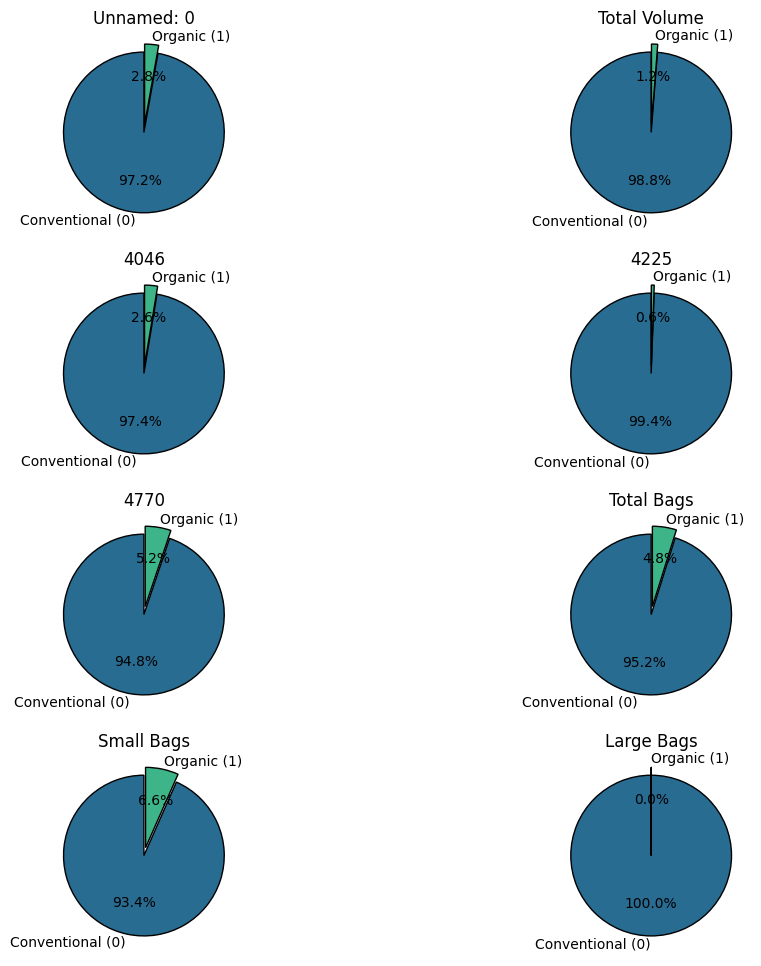

In [23]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (12,12))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i + 1)
    plt.pie(type_numerical_features_percentage[i],labels = ['Conventional (0)','Organic (1)'],autopct = '%1.1f%%',
            startangle = 90, explode = (0,0.1), colors = color1,
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    title = numerical_features[i]
    plt.title(title);

fig.tight_layout(pad = 1)

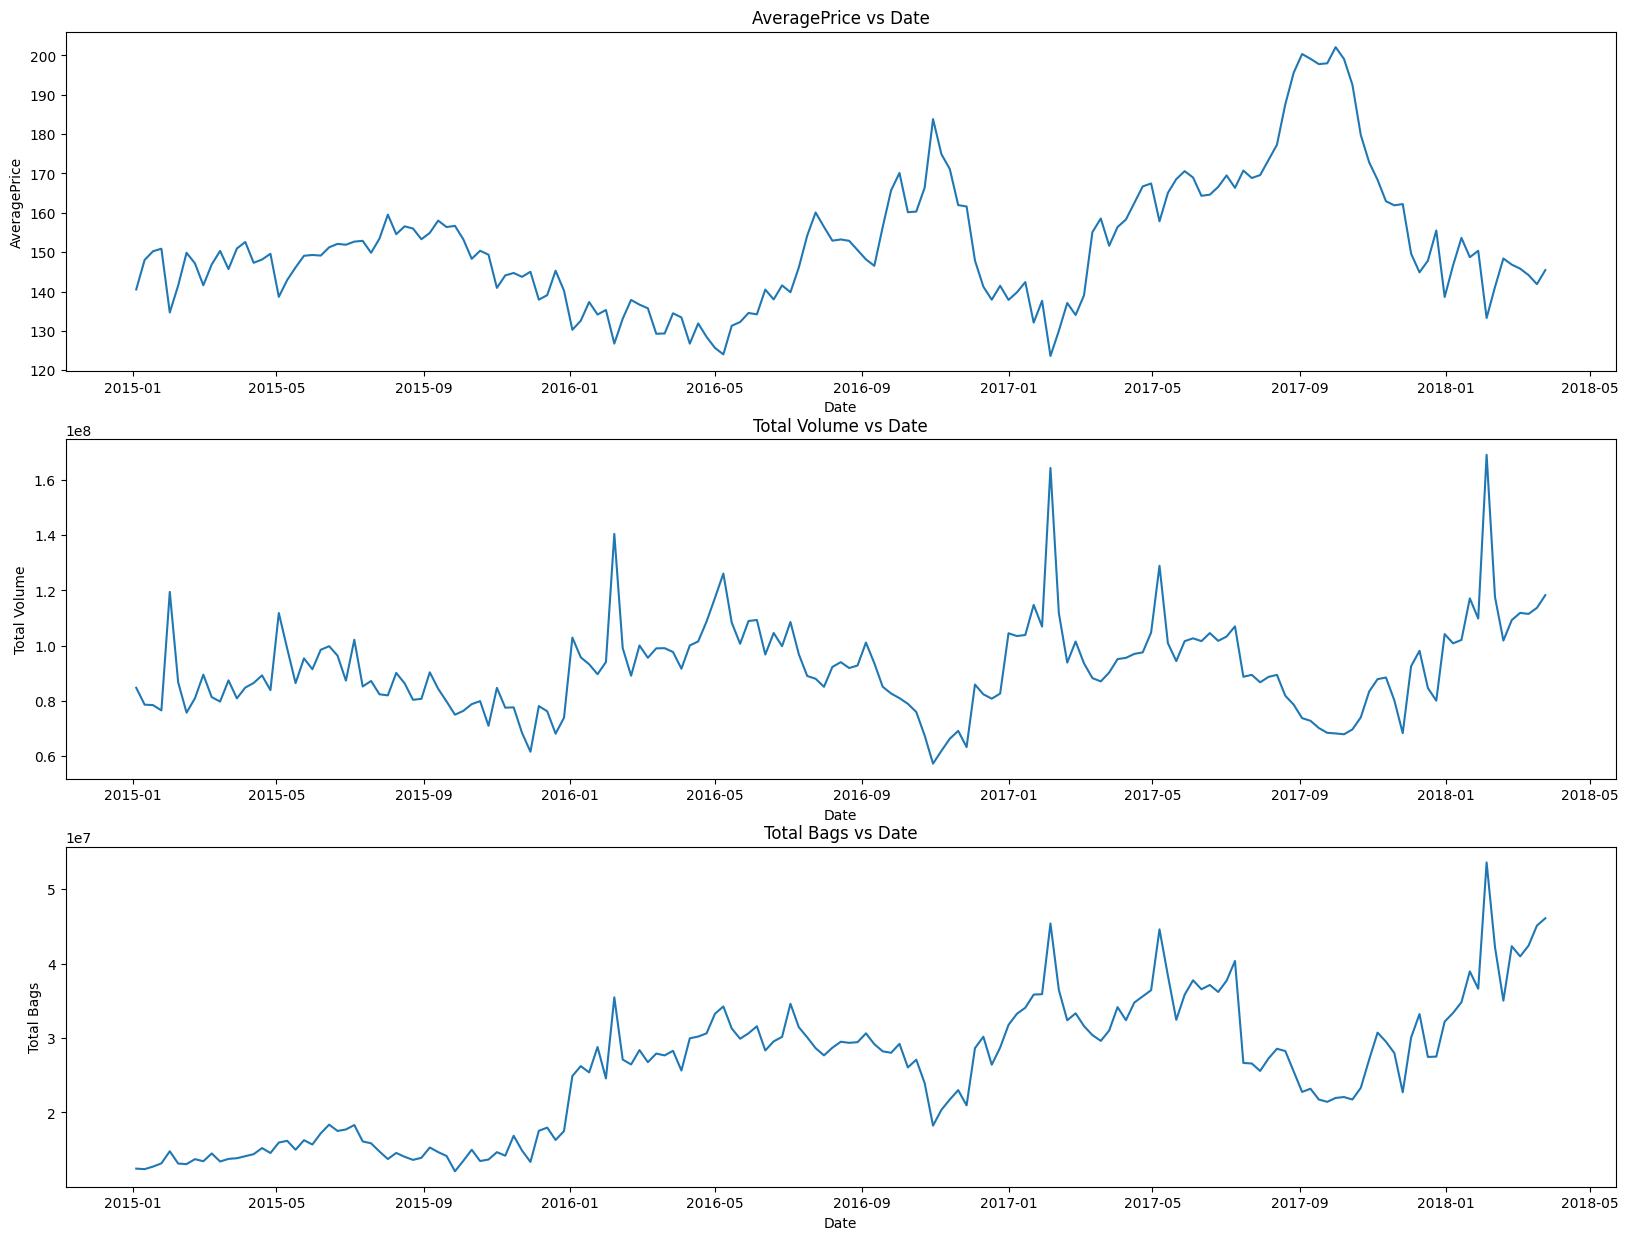

In [24]:
l1 = ['AveragePrice','Total Volume','Total Bags']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):

    plt.subplot(3,1,i+1)
    sns.lineplot(x = df1.index,y = l1[i],data = df1)
    title = l1[i] + ' vs Date'
    plt.title(title);

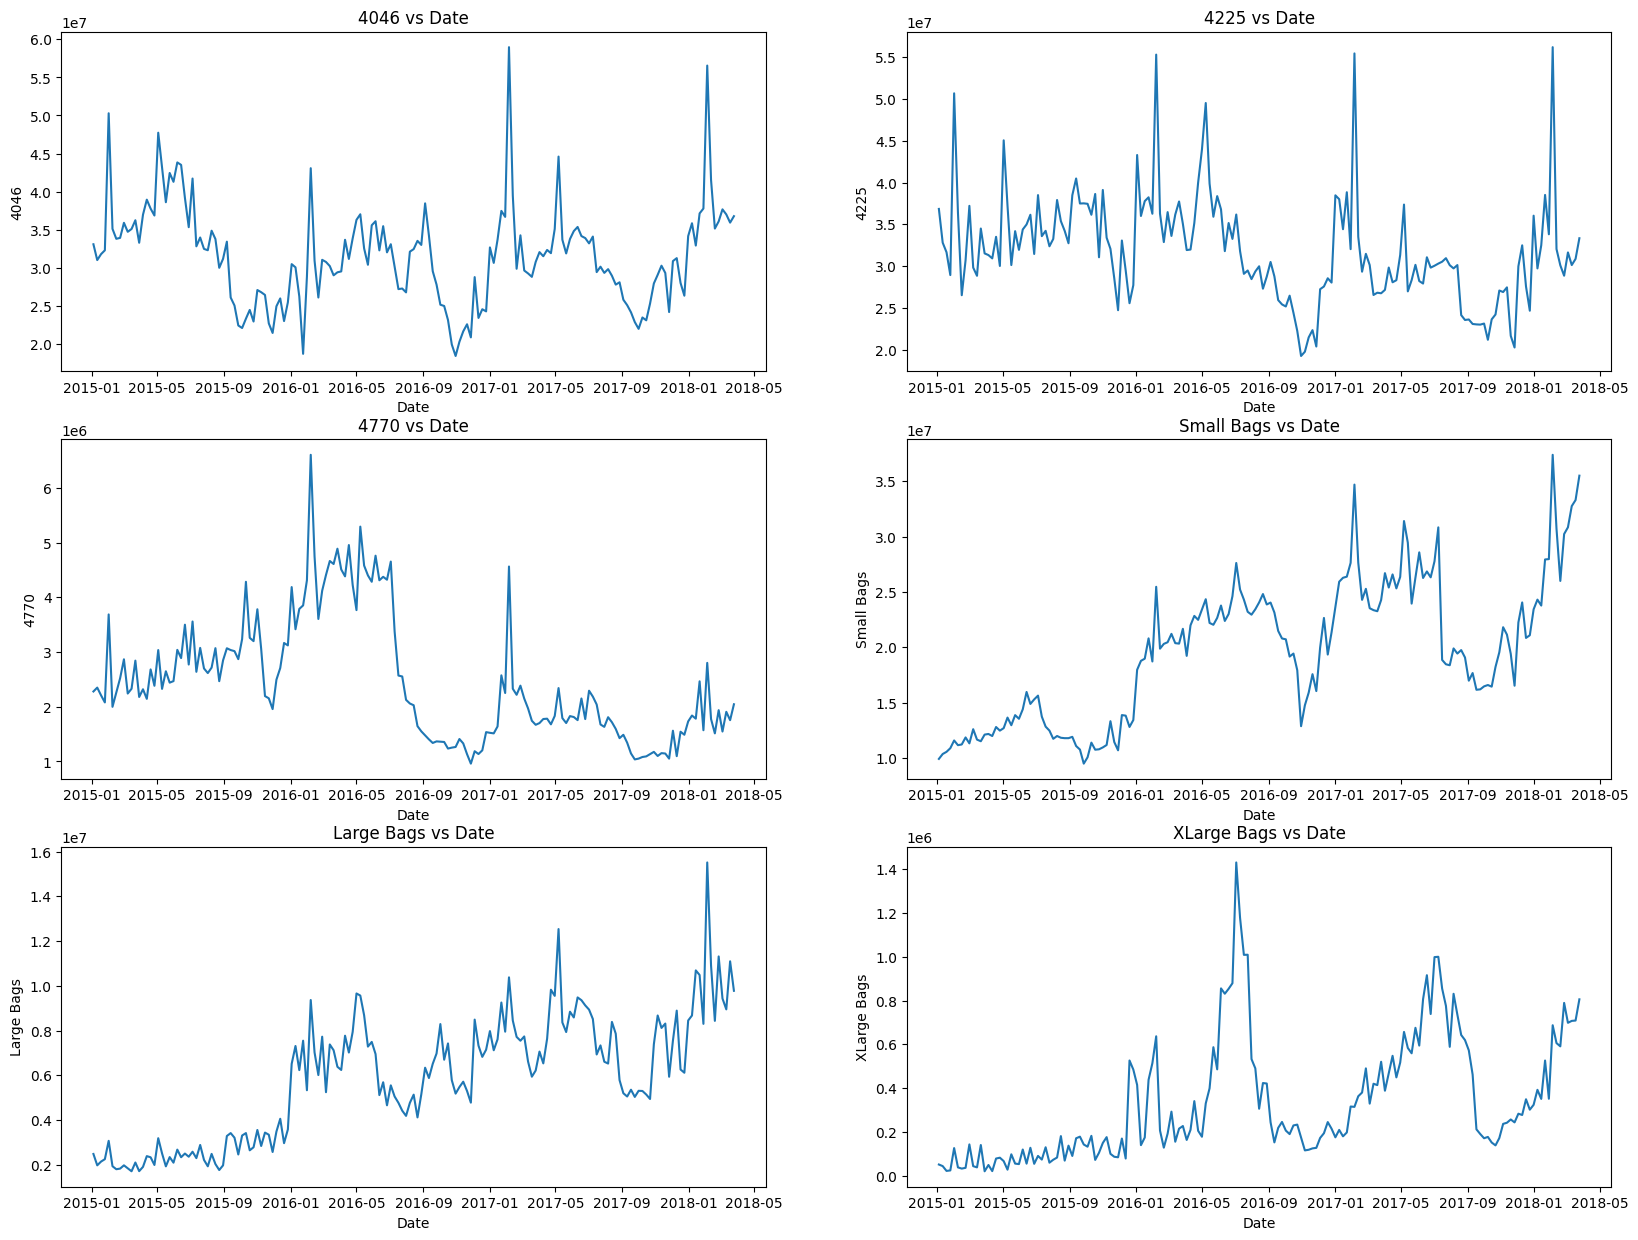

In [25]:
l2 = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,15))
for i in range(len(l2)):

    plt.subplot(3,2,i+1)
    sns.lineplot(x = df1.index,y = l2[i],data = df1)
    title = l2[i] + ' vs Date'
    plt.title(title);

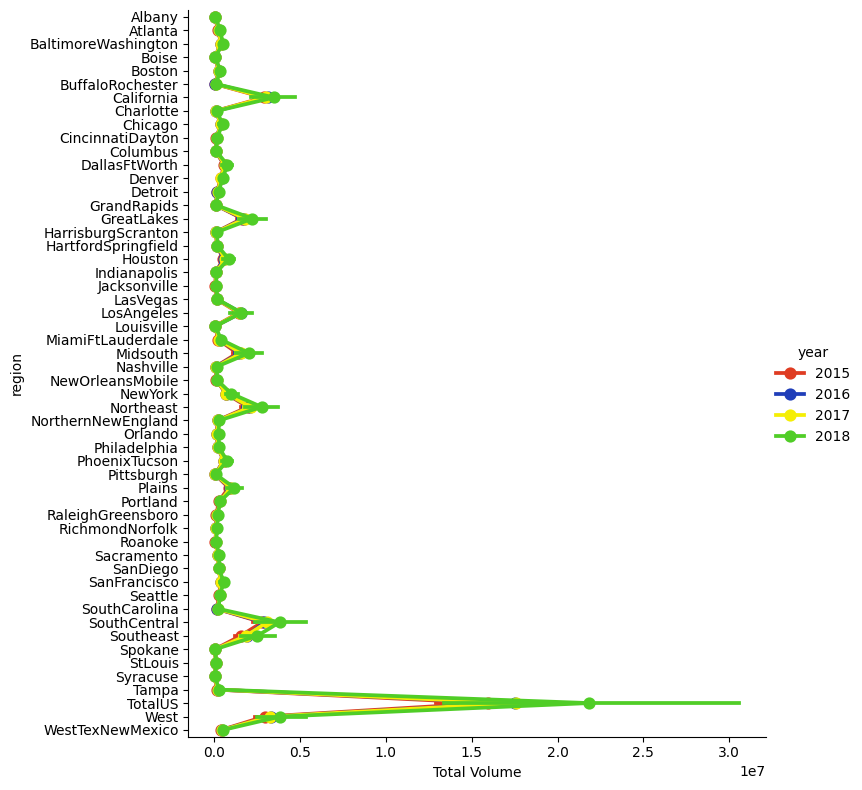

In [31]:
import seaborn as sns
import pandas as pd
color2 = ['#DF3C22','#203EB9', '#F5EE04','#50CD27']

# Pass 'data' only once as a keyword argument
sns.catplot(x='Total Volume', y='region', data=data, hue='year', height=8, palette=color2, kind='point');

#Summary of EDA
AveragePrice of the avocados starts just below 1.2 and is found to be rising above 1.8 during the peak season. This rise in AveragePrice is due to the low Total Volume of avocados around the months of December / January and drop in AveragePrice is in the months September - November.
When it comes down to the type of avocados, Conventional(0) dominates the Organic(1) type by a huge margin. AveragePrice of Conventional(0) type is just below 1.2 and for Organic(1) it is above 1.6.
Law of Supply & Demand can be observed for AveragePrice of avocados vs Total Volume & Total Bags.
A clear cut rising trend in the Total Volume of the avocados can be observed from 2015. Assuming the average purchase order of the avocados is quite high, customers prefer the Conventional(0) avocados due to its low AveragePrice compared to that of Organic(1).
For avocados based on PLU code 4046, 4225, 4770 following order of preference can be observed :
2015 : 4046 ≅ 4225 ≅ 4770
2016 : 4770 > 4225 > 4046
2017 : 4046 > 4225 > 4770
For bags, Law of Cause and Effect can be observed with Total Volume of avocados. As the Total Volume of the avocados increased, usage of bags for avocados went up as well.

#Time Series Analysis

In [55]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,5507,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,5399,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,5291,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,5183,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,5075,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,54,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


In [56]:
l3 = list(df1.columns)
l3.remove('AveragePrice')

df1.drop(columns = l3,inplace =True)
df1.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [57]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [58]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

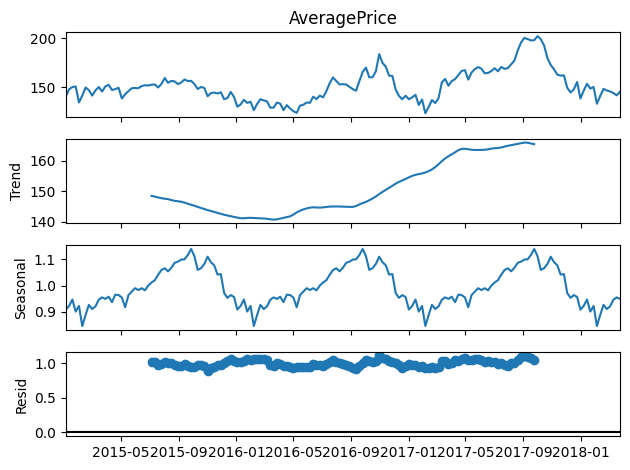

In [59]:
dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot()
plt.show();

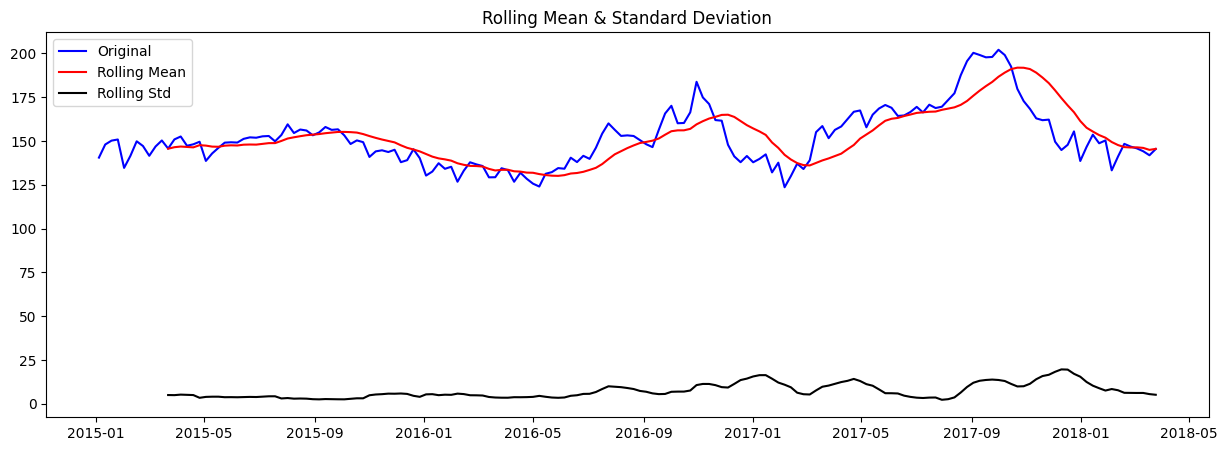

Results of Dickey-Fuller Test:
Test Statistic                 -2.36
p-value                         0.15
#Lags Used                      0.00
Number of Observations Used   168.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [60]:
test_stationarity(df1['AveragePrice'])

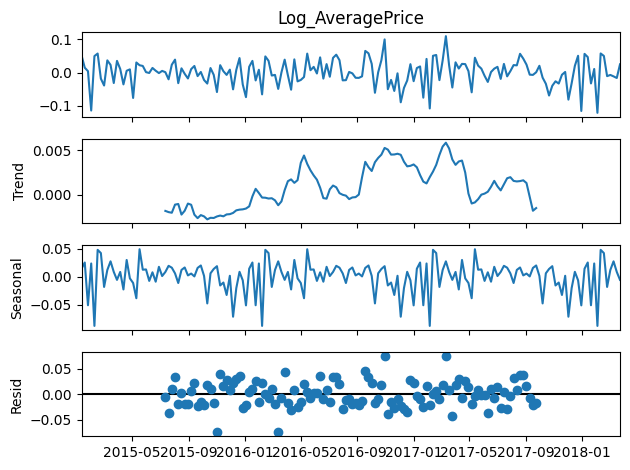

In [61]:
df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])
df1_log_diff = df1['Log_AveragePrice'].diff()
df1_log_diff = df1_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(df1_log_diff,period = 52).plot()
plt.show()

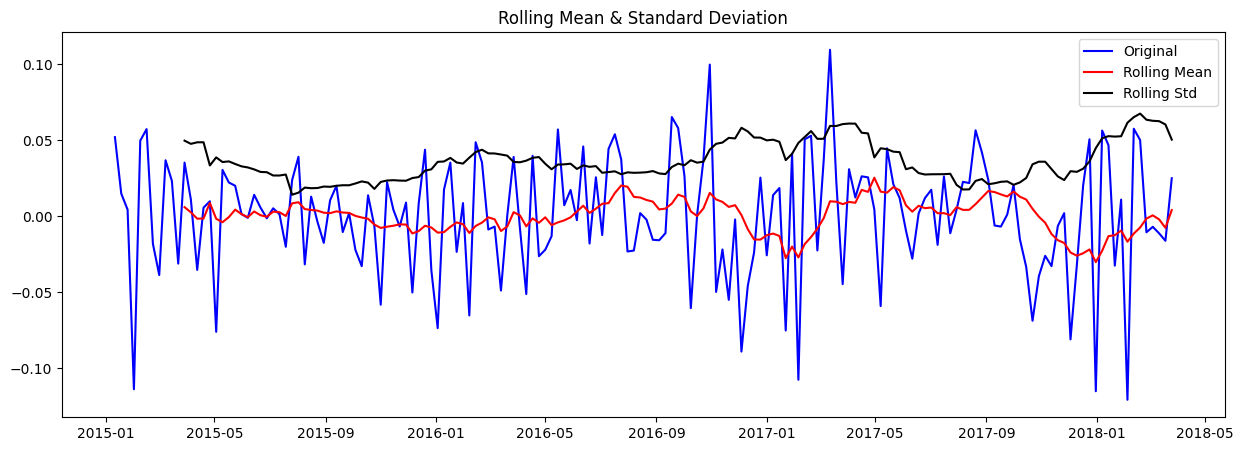

Results of Dickey-Fuller Test:
Test Statistic                -13.82
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   167.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [62]:
test_stationarity(df1_log_diff)

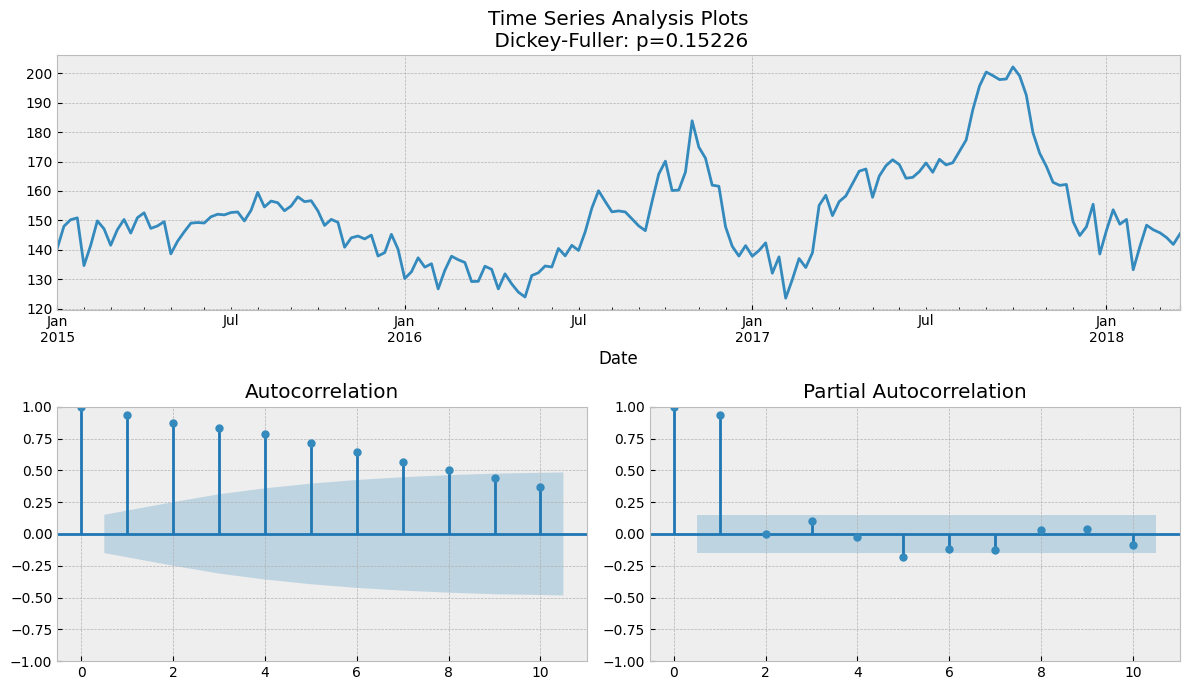

In [65]:
tsplot(df1['AveragePrice'],lags = 10)

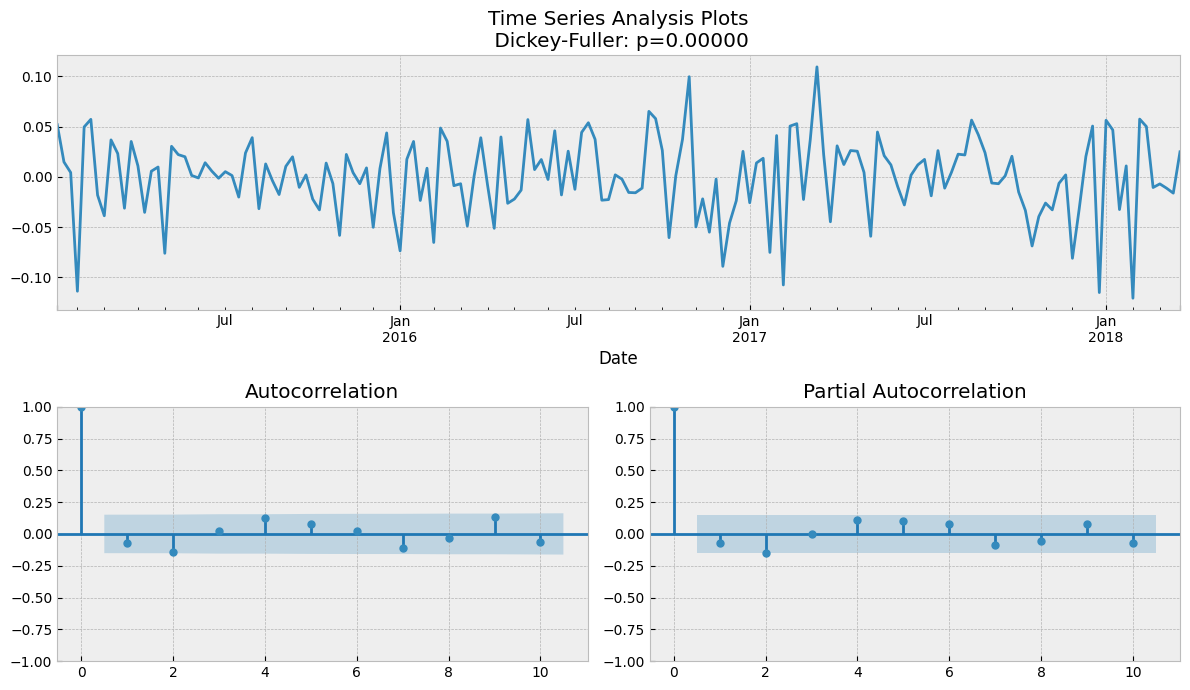

In [66]:
tsplot(df1_log_diff,lags = 10)

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1['Log_AveragePrice'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 308.987
Date:                Sun, 11 Aug 2024   AIC                           -609.975
Time:                        19:13:39   BIC                           -597.479
Sample:                    01-04-2015   HQIC                          -604.904
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1492      0.785     -0.190      0.849      -1.689       1.390
ma.L1          0.0735      0.776      0.095      0.925      -1.448       1.595
ma.L2         -0.1239      0.099     -1.252      0.2

In [69]:
df1

,AveragePrice,Log_AveragePrice
Date,,
2015-01-04,140.54,4.95
2015-01-11,148.03,5.00
2015-01-18,150.24,5.01
2015-01-25,150.89,5.02
2015-02-01,134.68,4.90
...,...,...
2018-02-25,146.84,4.99
2018-03-04,145.82,4.98
2018-03-11,144.19,4.97


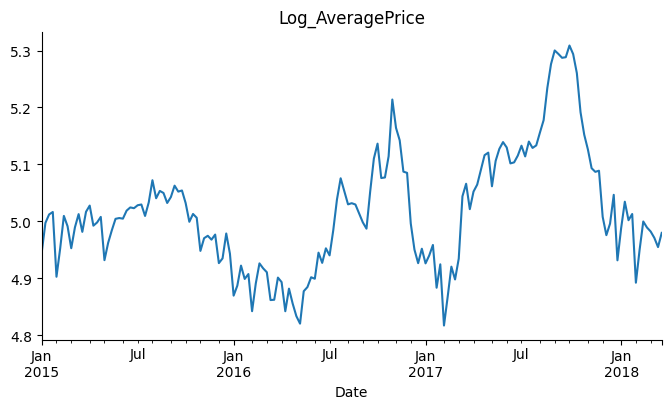

In [71]:
# @title Log_AveragePrice

from matplotlib import pyplot as plt
df1['Log_AveragePrice'].plot(kind='line', figsize=(8, 4), title='Log_AveragePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [75]:
# Fitted values of the model
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)

# Reversing the 1st order Differencing by taking cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA

# Creating a series with the same length as the original 'Log_AveragePrice'
# All the elements of this new series are same as the 1st element of the original 'Log_AveragePrice'
expected_log_values = pd.Series(df1['Log_AveragePrice'].iloc[0], index = df1['Log_AveragePrice'].index)

# Adding the elements of this newly created series with the cumulative sum series
expected_log_values = expected_log_values.add(predictions_ARIMA_cumsum,fill_value = 0)

# Taking log of the above series for getting the original values
predictions_ARIMA_final = np.exp(expected_log_values)


In [76]:
predictions_ARIMA_final

,0
Date,
2015-01-04,140.54
2015-01-11,19751.49
2015-01-18,20730.97
2015-01-25,20963.71
2015-02-01,21162.86
...,...
2018-02-25,20633.47
2018-03-04,20568.22
2018-03-11,20508.96


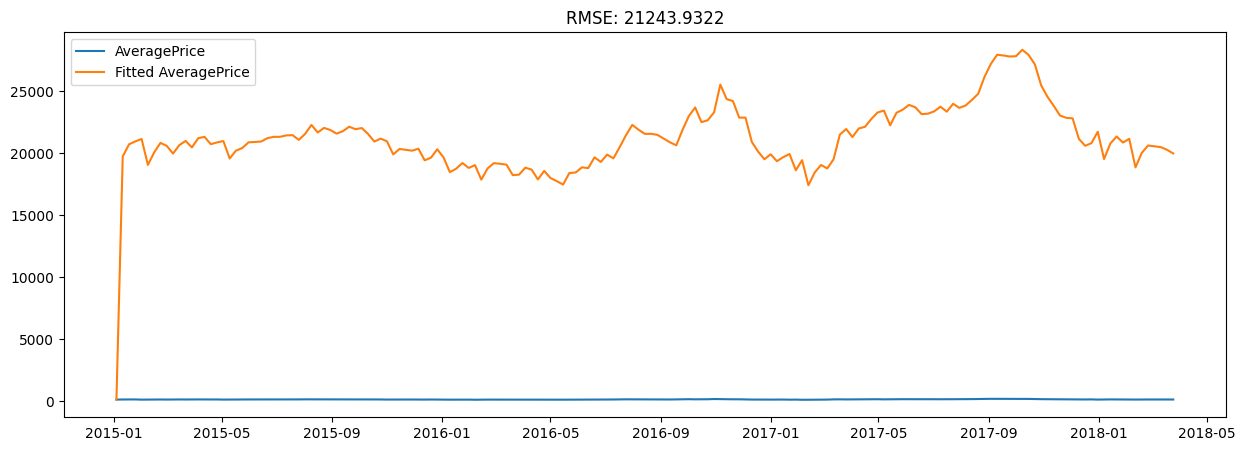

In [77]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'AveragePrice')
plt.plot(predictions_ARIMA_final,label = 'Fitted AveragePrice');
plt.legend(loc="upper left")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_final - df1['AveragePrice'])**2)/len(df1['AveragePrice'])));

In [49]:
size = int(len(df1) - 30)
train, test = df1['Log_AveragePrice'][0:size], df1['Log_AveragePrice'][size:len(df1)]

print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit(disp = 0)

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 ARIMA MODEL : In - Sample Forecasting 



NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [ ]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

In [ ]:
f1 = np.array(np.exp(model_fit.forecast(steps = 51)[0]))

for i in range(len(f1)):
    forecast.iloc[169 + i,2] = f1[i]
forecast.tail()

In [ ]:
f2 = np.array(np.exp(model_fit.predict(start = 169,end = 219,typ = 'levels')))

for i in range(51):
    forecast.iloc[169 + i,3] = f2[i]
forecast.tail()

In [ ]:
forecast[['AveragePrice','ARIMA_Predict_Function']].plot(figsize = (12,8));

In [ ]:
sum(f1) == sum(f2)

SARIMA

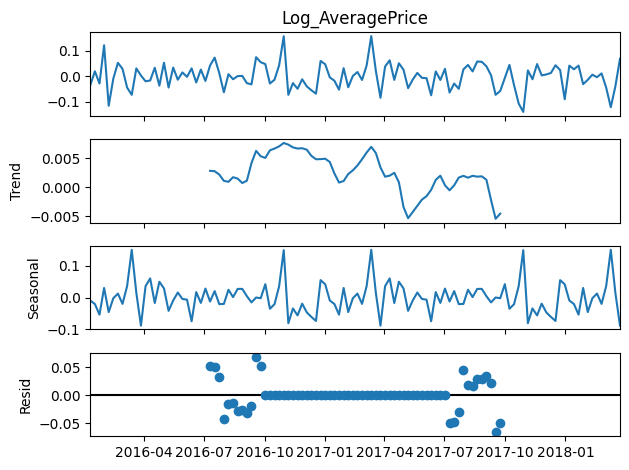

In [78]:
df1_log_diff_seas = df1_log_diff.diff(52)
df1_log_diff_seas = df1_log_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(df1_log_diff_seas).plot()
plt.show()

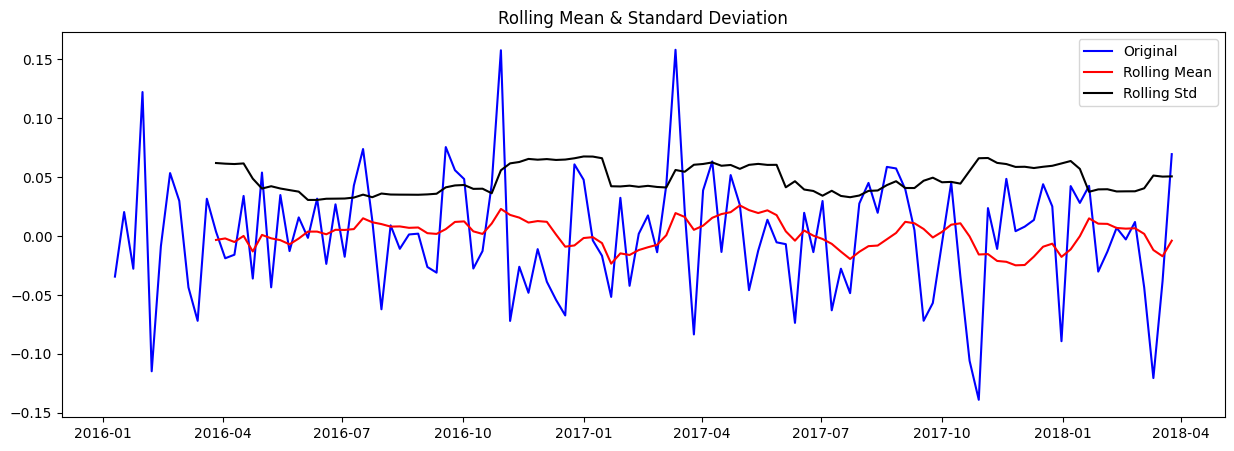

Results of Dickey-Fuller Test:
Test Statistic                 -4.60
p-value                         0.00
#Lags Used                     11.00
Number of Observations Used   104.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64


In [79]:
test_stationarity(df1_log_diff_seas)

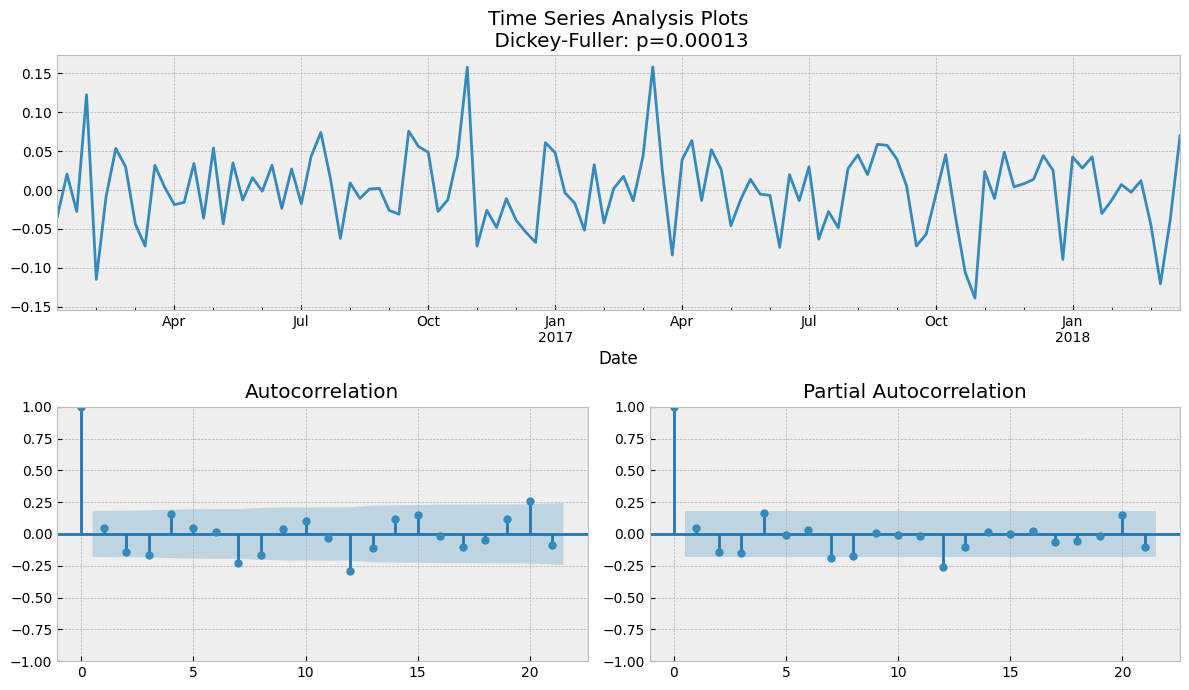

In [80]:
tsplot(df1_log_diff_seas)

In [81]:
model = sm.tsa.statespace.SARIMAX(df1['Log_AveragePrice'],order = (1,1,2),seasonal_order = (0,1,0,52))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                    Log_AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 52)   Log Likelihood                 184.924
Date:                             Sun, 11 Aug 2024   AIC                           -361.848
Time:                                     19:23:19   BIC                           -350.834
Sample:                                 01-04-2015   HQIC                          -357.377
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7792      0.166      4.696      0.000       0.454       1.104
ma.L1         -0.7519      

In [82]:
size = int(len(df1) - 30)
train, test = df1['Log_AveragePrice'][0:size], df1['Log_AveragePrice'][size:len(df1)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = sm.tsa.statespace.SARIMAX(history,order = (1,1,2),seasonal_order = (0,1,0,52))
    model_fit = model.fit(disp = 0)

    output = model_fit.forecast()

    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 SARIMA MODEL : In - Sample Forecasting 



<ipython-input-82-520a176a78d3>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 190.139066, expected = 200.360000
predicted = 196.126495, expected = 199.140000
predicted = 211.037017, expected = 197.790000
predicted = 207.504225, expected = 198.000000
predicted = 202.787502, expected = 202.100000
predicted = 190.648998, expected = 199.080000
predicted = 199.363336, expected = 192.550000
predicted = 199.445814, expected = 179.770000
predicted = 199.347657, expected = 172.820000
predicted = 165.636797, expected = 168.380000
predicted = 169.250186, expected = 162.950000
predicted = 156.631422, expected = 161.910000
predicted = 164.719655, expected = 162.230000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 150.102117, expected = 149.620000
predicted = 144.451707, expected = 144.880000
predicted = 142.802795, expected = 147.850000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 152.898609, expected = 155.510000
predicted = 151.978344, expected = 138.620000
predicted = 140.295198, expected = 146.640000
predicted = 150.886886, expected = 153.640000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 142.549652, expected = 148.730000
predicted = 155.136774, expected = 150.360000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 134.572446, expected = 133.280000
predicted = 140.249573, expected = 141.160000
predicted = 149.049635, expected = 148.400000
predicted = 145.166073, expected = 146.840000
predicted = 152.441971, expected = 145.820000
predicted = 162.540832, expected = 144.190000
predicted = 147.750965, expected = 141.880000
predicted = 137.901462, expected = 145.460000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


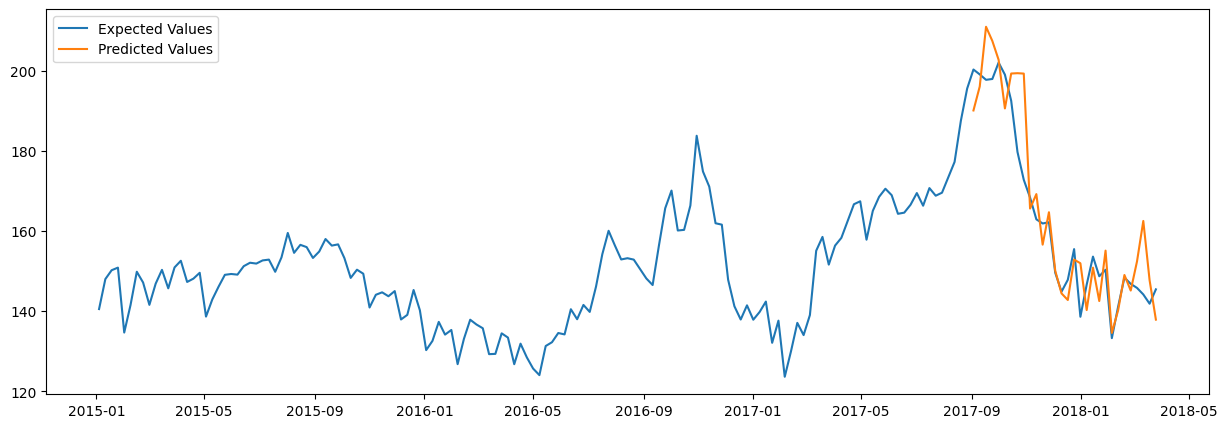

In [83]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [84]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test RMSE: 9.0690


In [113]:
# Create an empty DataFrame named 'forecast'
from pandas.tseries.offsets import DateOffset
future_dates = [df1.index[-1] + DateOffset(weeks = x) for x in range(0,52)]
forecast = pd.DataFrame(index = future_dates[1:],columns = df1.columns)


# Now you can assign values to columns within 'forecast'
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,Log_AveragePrice,SARIMA_Forecast_Function,SARIMA_Predict_Function
2018-04-01,NaN,NaN,NaN,NaN
2018-04-08,NaN,NaN,NaN,NaN
2018-04-15,NaN,NaN,NaN,NaN
2018-04-22,NaN,NaN,NaN,NaN
2018-04-29,NaN,NaN,NaN,NaN


In [114]:

f3 = np.array(np.exp(model_fit.forecast(steps = 51)))

# Start assigning from index 169
for i in range(len(f3)):
    forecast.iloc[169 + i, 1] = f3[i]  # Assuming 'SARIMA_Predict_Function' is at index 1
forecast.tail()

IndexError: iloc cannot enlarge its target object

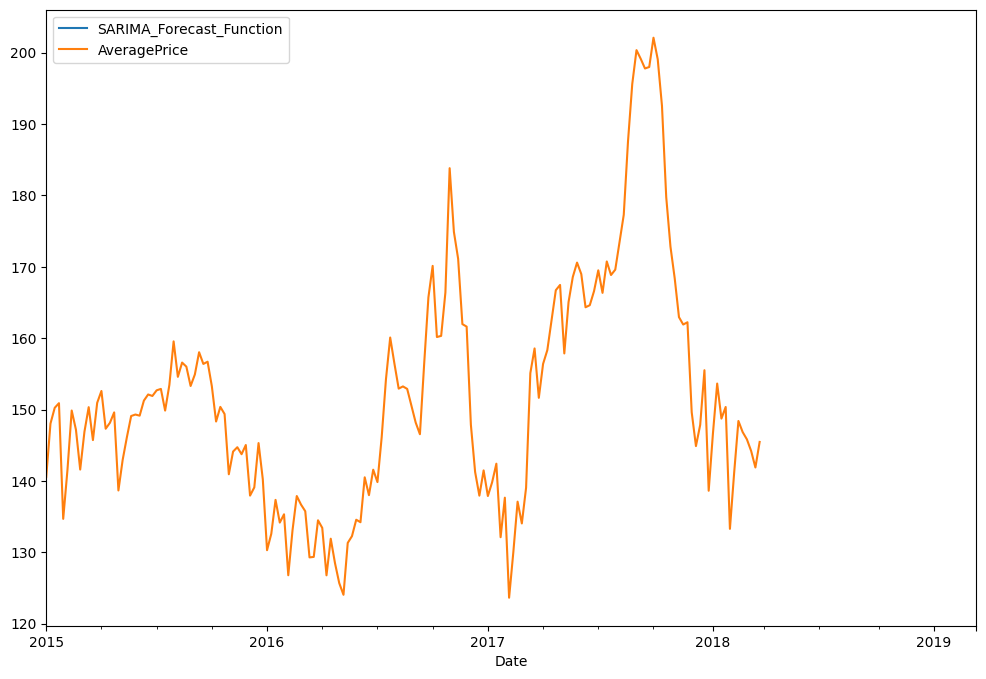

In [115]:
# Assuming 'df1' contains the 'AveragePrice' column you want to plot
forecast[['SARIMA_Forecast_Function']].plot(figsize = (12,8), legend=True)
df1['AveragePrice'].plot(legend=True)  # Plot 'AveragePrice' from df1 on the same axes
plt.legend(loc="upper left")
plt.show()

In [107]:
f4 = np.array(np.exp(model_fit.predict(start = 169,end = 219,typ = 'levels')))

# Assign to an existing column index (0 or 1) or create a new column
for i in range(51):
    forecast.iloc[169 + i, 0] = f4[i]  # Change 5 to 0 or 1, or create a new column
forecast.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,SARIMA_Forecast_Function,SARIMA_Predict_Function
215,147.64,140.44
216,146.09,147.64
217,145.08,146.09
218,143.46,145.08
219,141.16,143.46


In [108]:
# prompt: in thee above table add Averageprice column in the table

forecast['AveragePrice'] = data['AveragePrice']
forecast.tail()


,SARIMA_Forecast_Function,SARIMA_Predict_Function,AveragePrice
215,147.64,140.44,1.04
216,146.09,147.64,1.06
217,145.08,146.09,1.02
218,143.46,145.08,0.94
219,141.16,143.46,1.14


In [112]:
f4 = np.array(np.exp(model_fit.predict(start = 169,end = 219,typ = 'levels')))

for i in range(51):
    forecast.iloc[169 + i,5] = f4[i]
forecast.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


IndexError: iloc cannot enlarge its target object

In [110]:
forecast.tail

<bound method NDFrame.tail of      SARIMA_Forecast_Function  SARIMA_Predict_Function  AveragePrice
0                         NaN                      NaN          1.33
1                         NaN                      NaN          1.35
2                         NaN                      NaN          0.93
3                         NaN                      NaN          1.08
4                         NaN                      NaN          1.28
..                        ...                      ...           ...
215                    147.64                   140.44          1.04
216                    146.09                   147.64          1.06
217                    145.08                   146.09          1.02
218                    143.46                   145.08          0.94
219                    141.16                   143.46          1.14

[220 rows x 3 columns]>

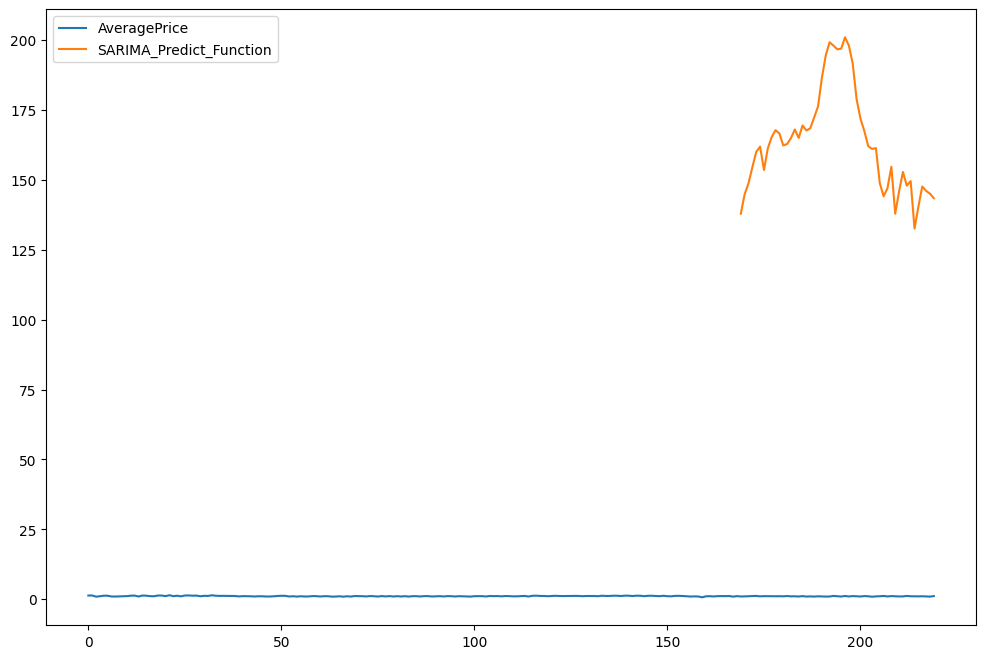

In [111]:
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));